# Import PycroMagnetics

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import os

path = os.getcwd()
path = os.path.dirname(path)
path = os.path.dirname(path)
sys.path.append(path)

import PycroMagnetics.pymag as ppm
import PycroMagnetics.mag_visualize as pmv
from PycroMagnetics import magmatlib as mml

# Define Physical Space

> `PycroMagnetics.pymag.Ferromagnet` is physical space for the micromagnetic simulation.

> Here, `Lx`, `Ly` and `Lz` are the lenght of the space along the x-, y-, and z-axis [unit: cm] . 

> Here, `nx`, `ny` and `nz` are the number of grid points in the x-, y-, and z-direction.

In [3]:
m1 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

> In the space, you can set the `mask`, which describes the geometry of a magnetic entity.

> `setCylindricalMask` method can generate an elliptical cylinderical mask, whose base plane is parellel to the x-y plane.

> `center_x`, `center_y`, `center_z` are the central position of the mask [unit: cm].

> `radius_x` and `radius_y` are the radii along the x- and y-axis before rotation [unit: cm].

> `height` is the height of the mask [unit: cm].

> `angle` is the clockwise angle of rotation about the z-axis [unit: deg]

In [4]:
m1.setCylindricalMask(center_x=25*10**-7, 
                      center_y=25*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=10*10**-7, 
                      radius_y=10*10**-7, 
                      height=5*10**-7,
                      angle=0)

> `PycroMagnetics.mag_visualize.show_mask` can visualize the mask of the space.

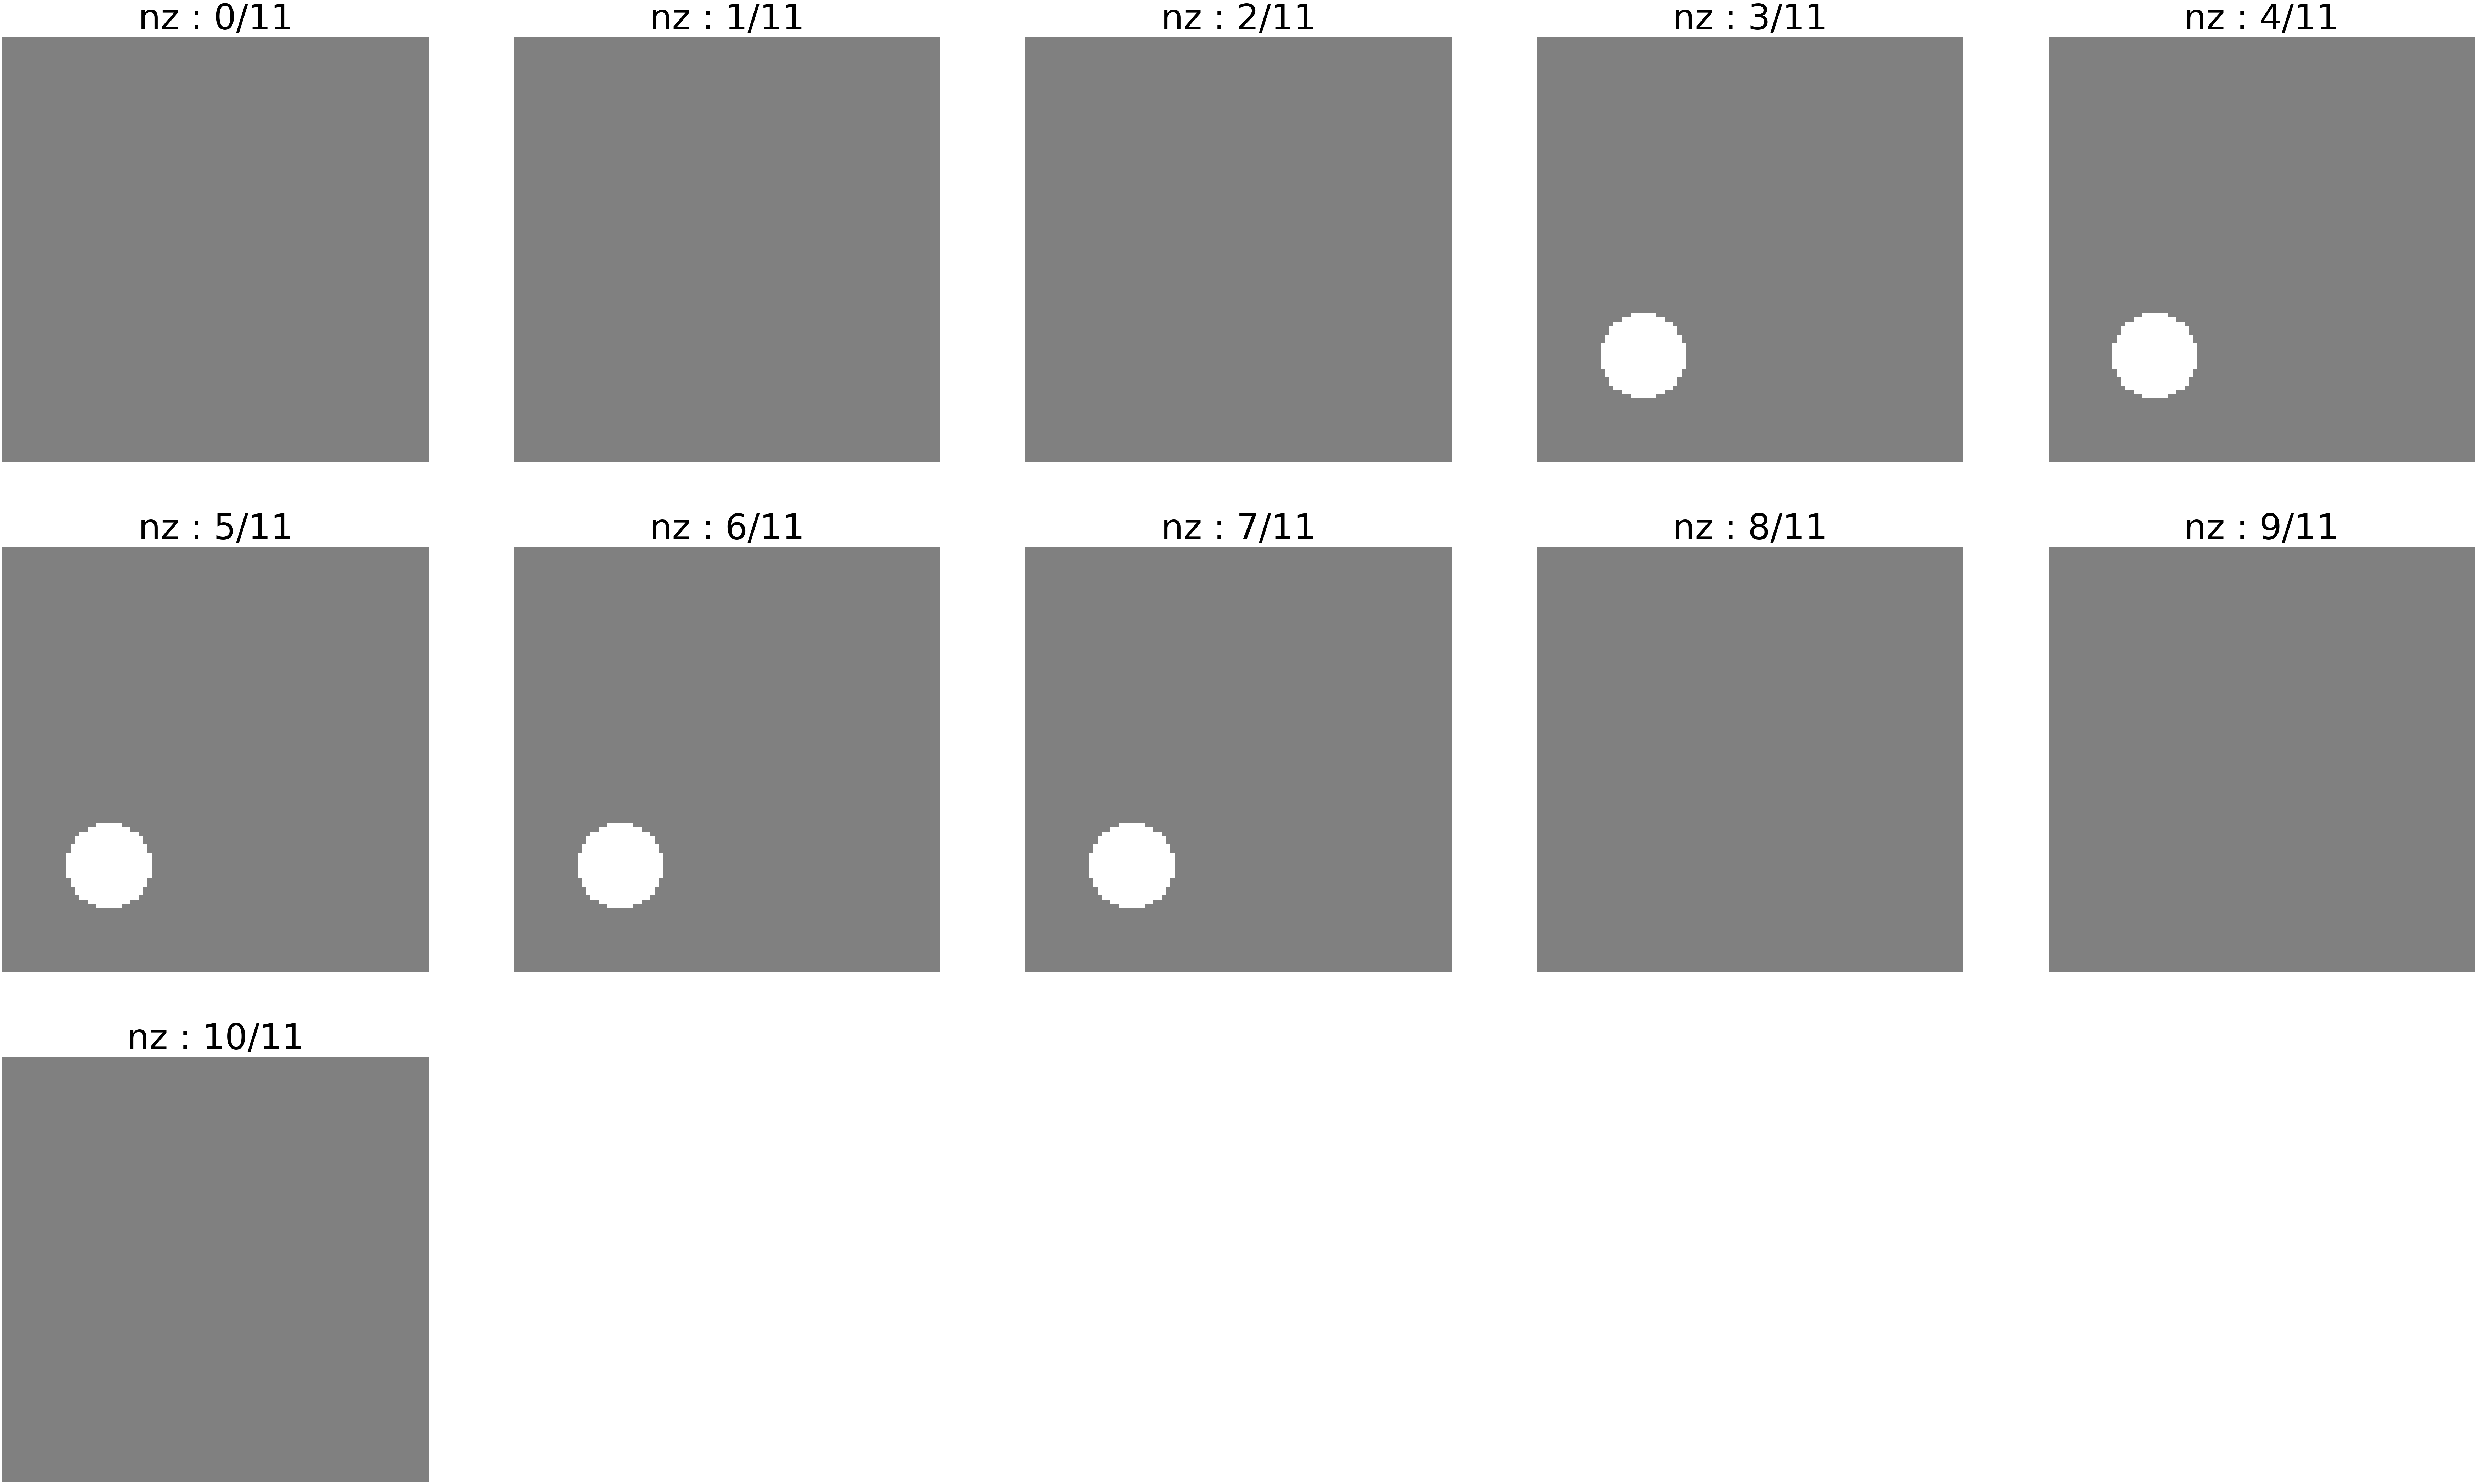

In [5]:
pmv.show_mask(m1, figsize=(25,25), fontsize=100)

> You can also compose objects by using `union`, `intersection`, and `difference` methods 

> Here, the physical space parameters should be the same.

In [6]:
m2 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

m2.setCylindricalMask(center_x=35*10**-7, 
                      center_y=25*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=10*10**-7, 
                      radius_y=10*10**-7, 
                      height=5*10**-7,
                      angle=0)

In [7]:
m_union = m1.union(m2)
m_intersection = m1.intersection(m2)
m_difference = m1.difference(m2)

UNION


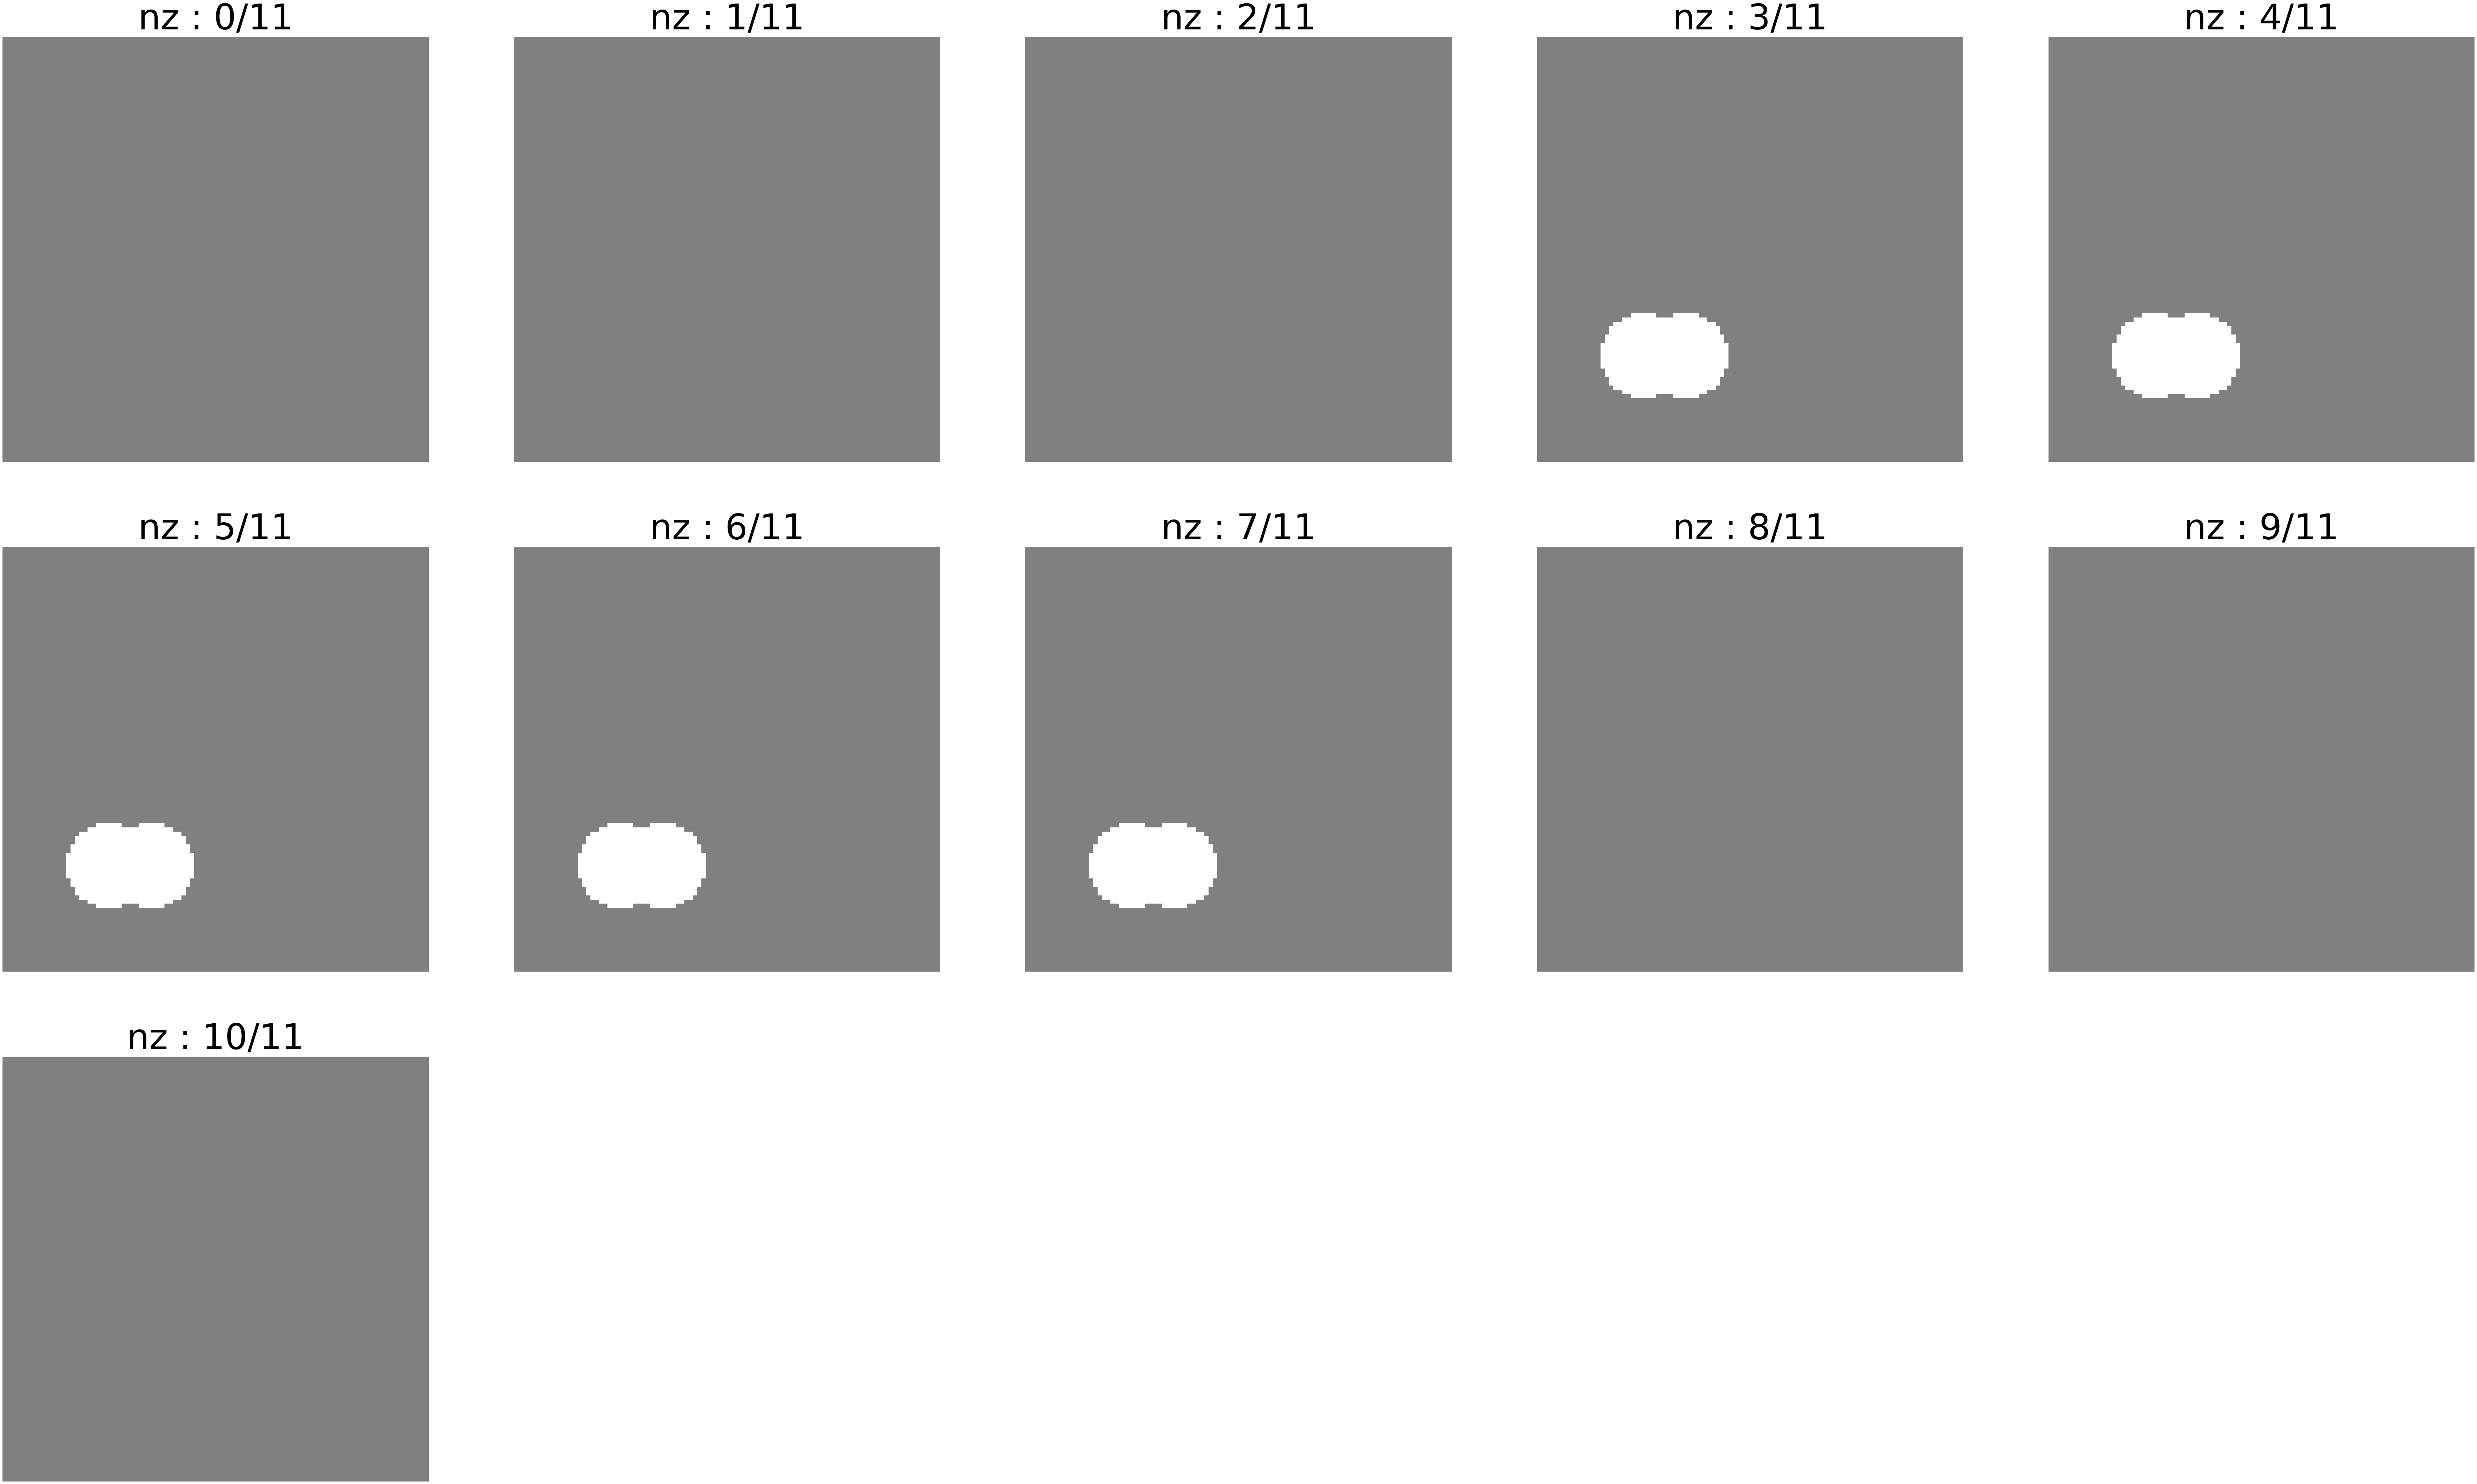

INTERSECTION


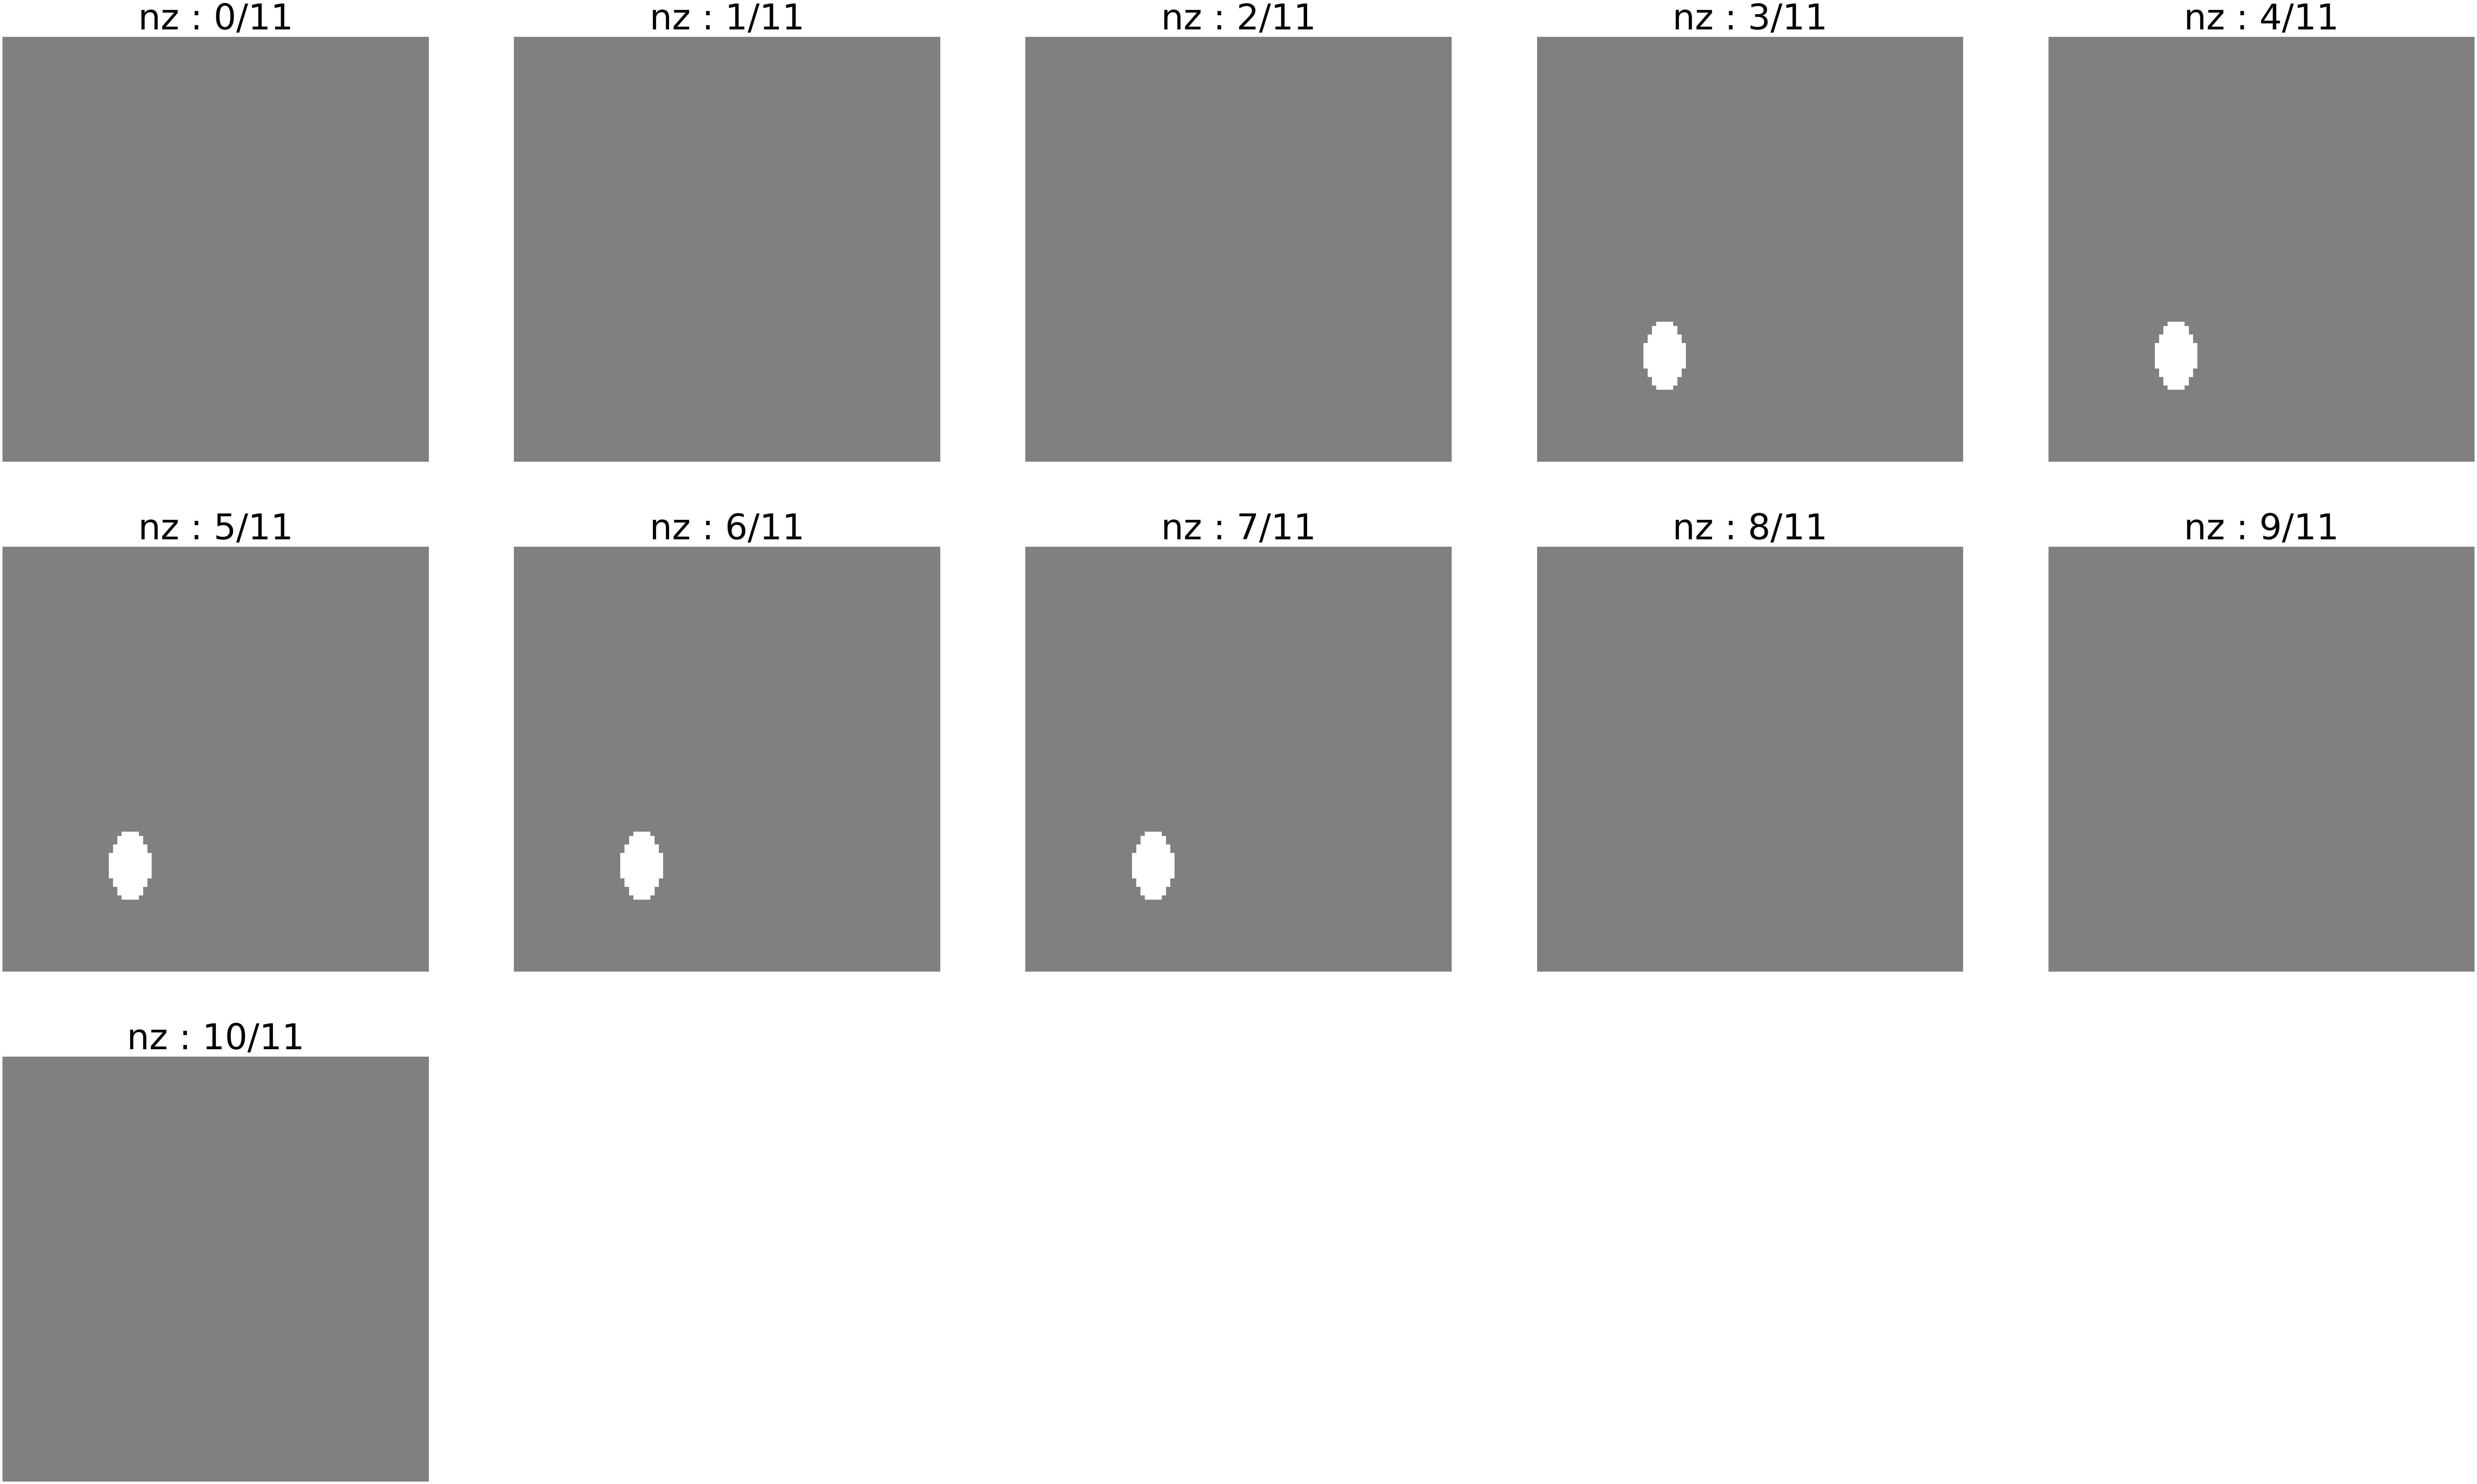

DIFFERENCE


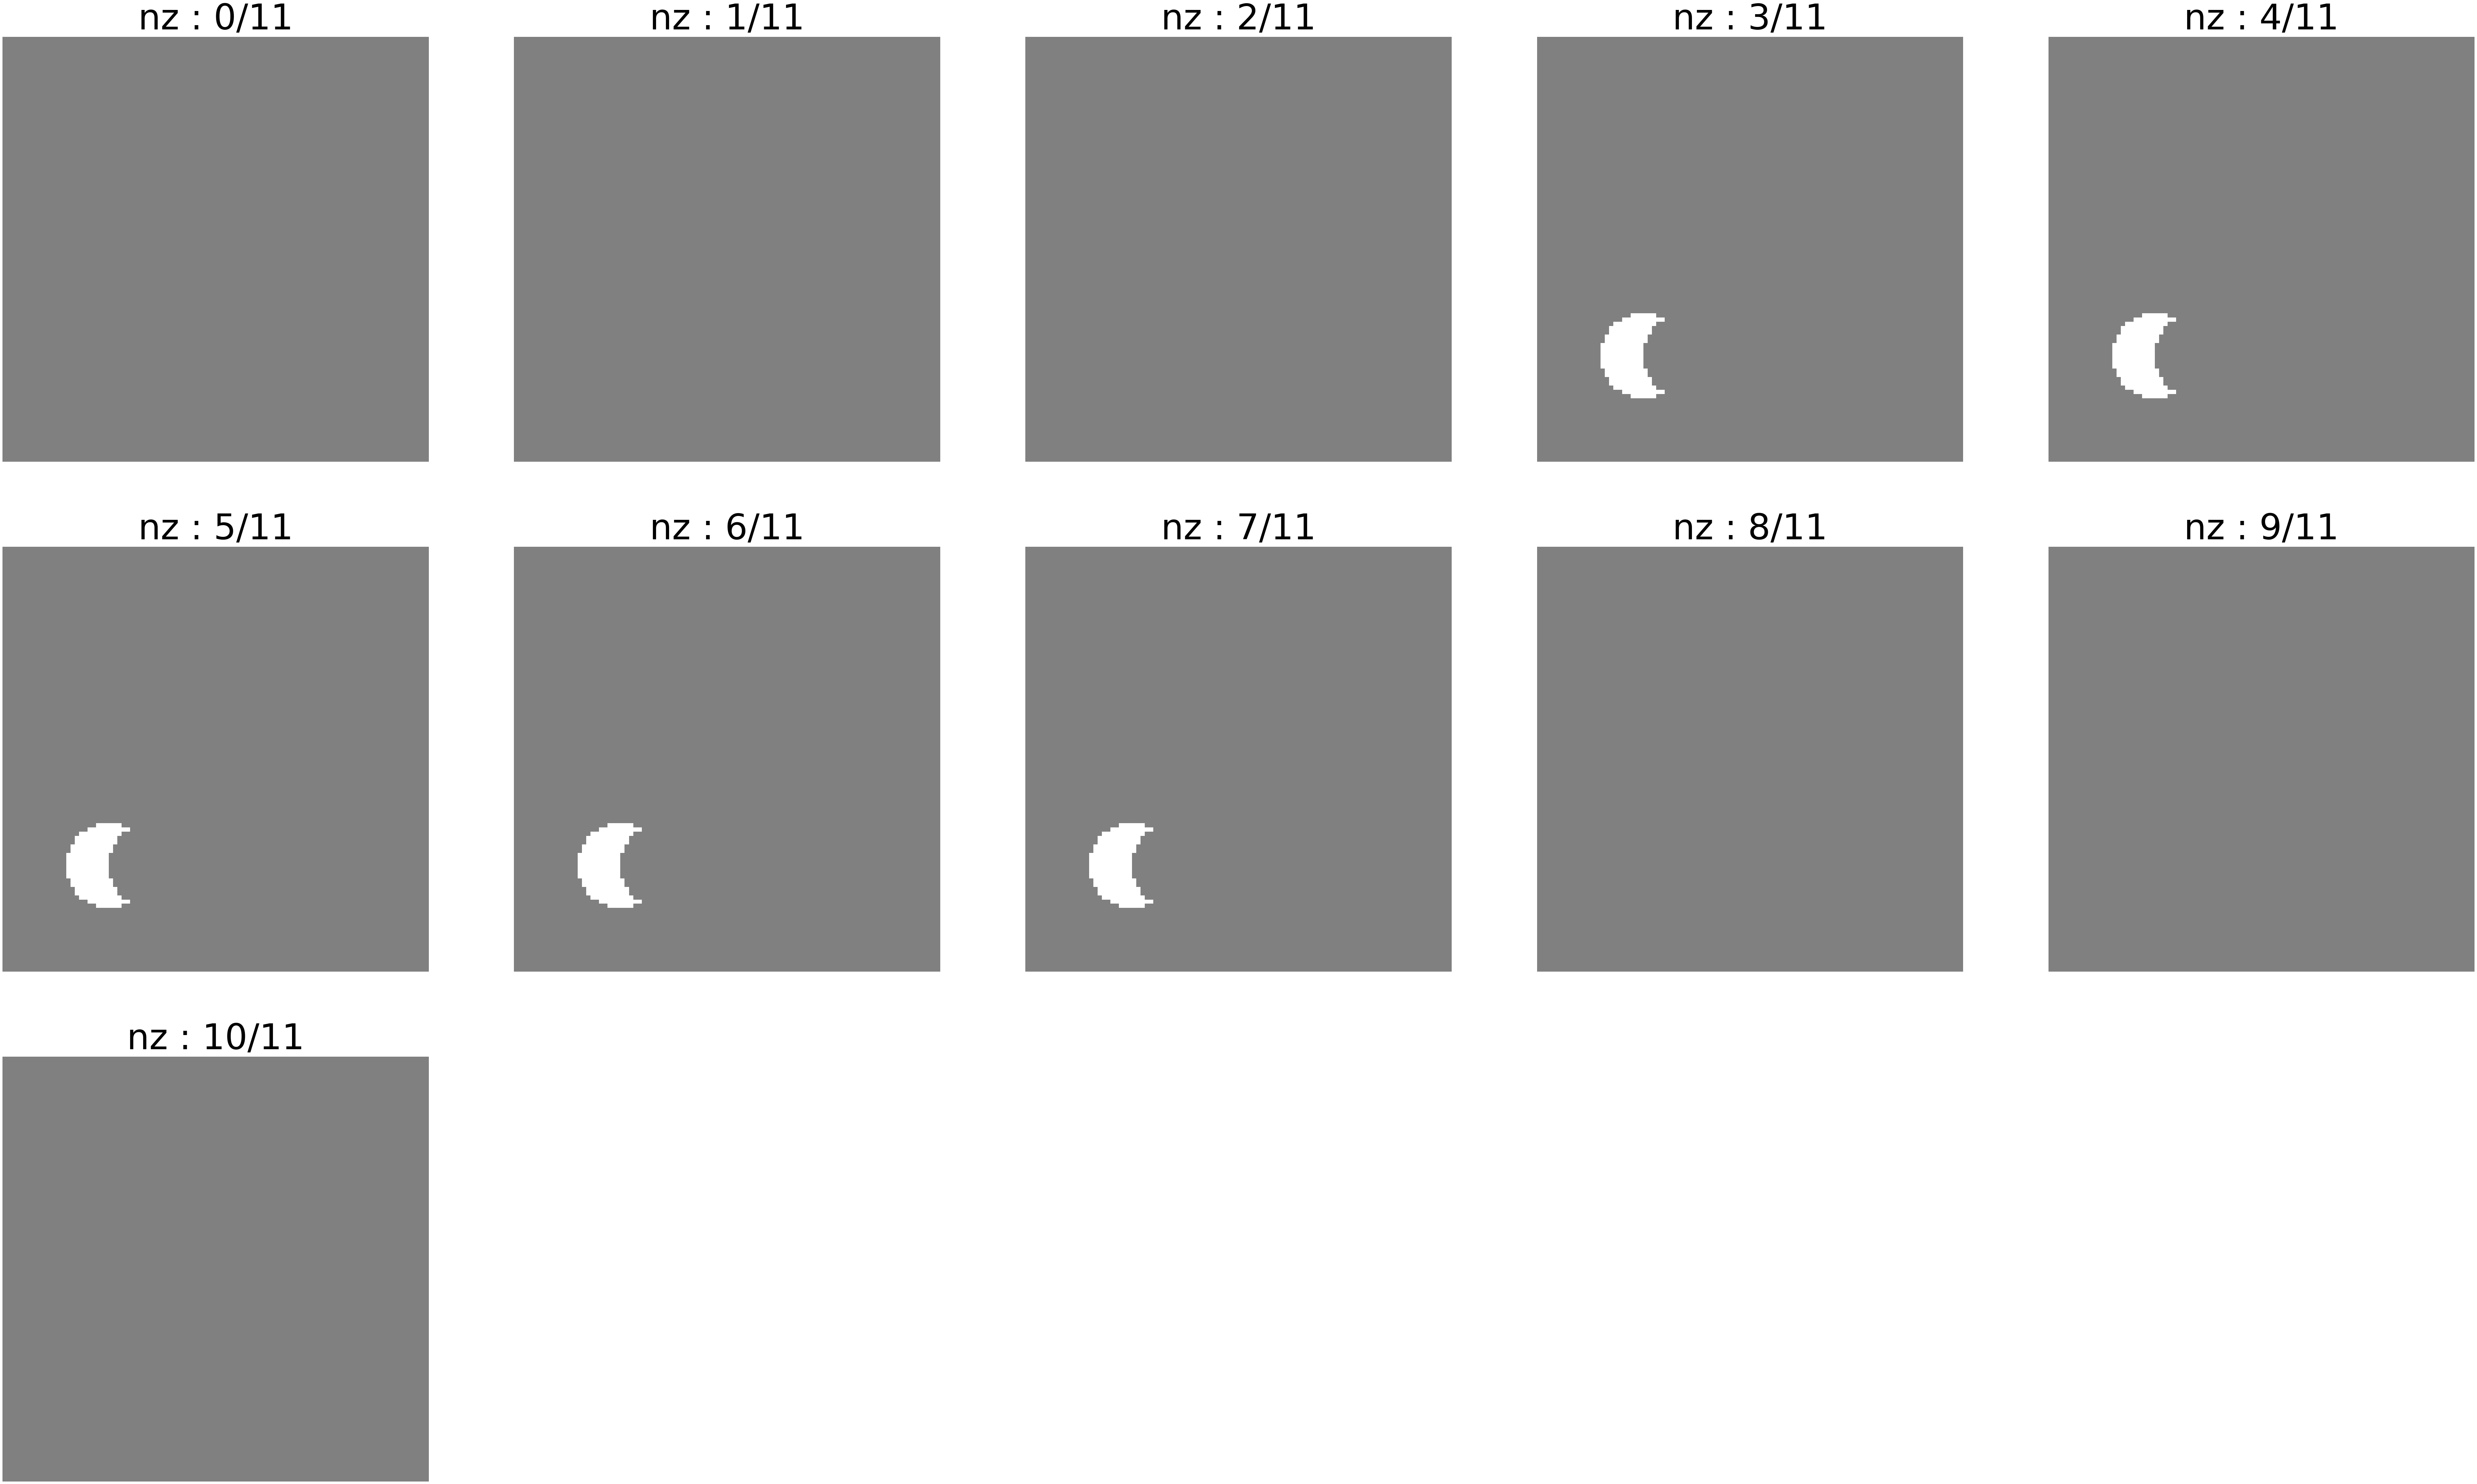

In [8]:
print('UNION')
pmv.show_mask(m_union, figsize=(25,25), fontsize=100)
print('INTERSECTION')
pmv.show_mask(m_intersection, figsize=(25,25), fontsize=100)
print('DIFFERENCE')
pmv.show_mask(m_difference, figsize=(25,25), fontsize=100)

# Set magnetic materials and properties

> The magnetic materials can be asigned to the mask.

In [3]:
# Get a material from library
mater1 = mml.Ni_PolyCrystal()

# Print propertise
mater1.properties()

# You can modifiy individual property as follows:
mater1.Ms = 400

# Print propertise
mater1.properties()

================= Ni_PolyCrystal =================
Ms 	 : 484 emu/cc
Aex 	 : 1.05e-06 erg/cm
K1 	 : 0 erg/cc
K2 	 : 0 erg/cc
Ku 	 : 0 erg/cc
thetaK 	 : 0 deg
phiK 	 : 0 deg
gamma 	 : 17600000.0 Oe^-1*s^-1
alpha 	 : 10 dimensionless
DDMI 	 : 0 erg/cm^2
Temp 	 : 300 K
================= Ni_PolyCrystal =================
Ms 	 : 400 emu/cc
Aex 	 : 1.05e-06 erg/cm
K1 	 : 0 erg/cc
K2 	 : 0 erg/cc
Ku 	 : 0 erg/cc
thetaK 	 : 0 deg
phiK 	 : 0 deg
gamma 	 : 17600000.0 Oe^-1*s^-1
alpha 	 : 10 dimensionless
DDMI 	 : 0 erg/cm^2
Temp 	 : 300 K


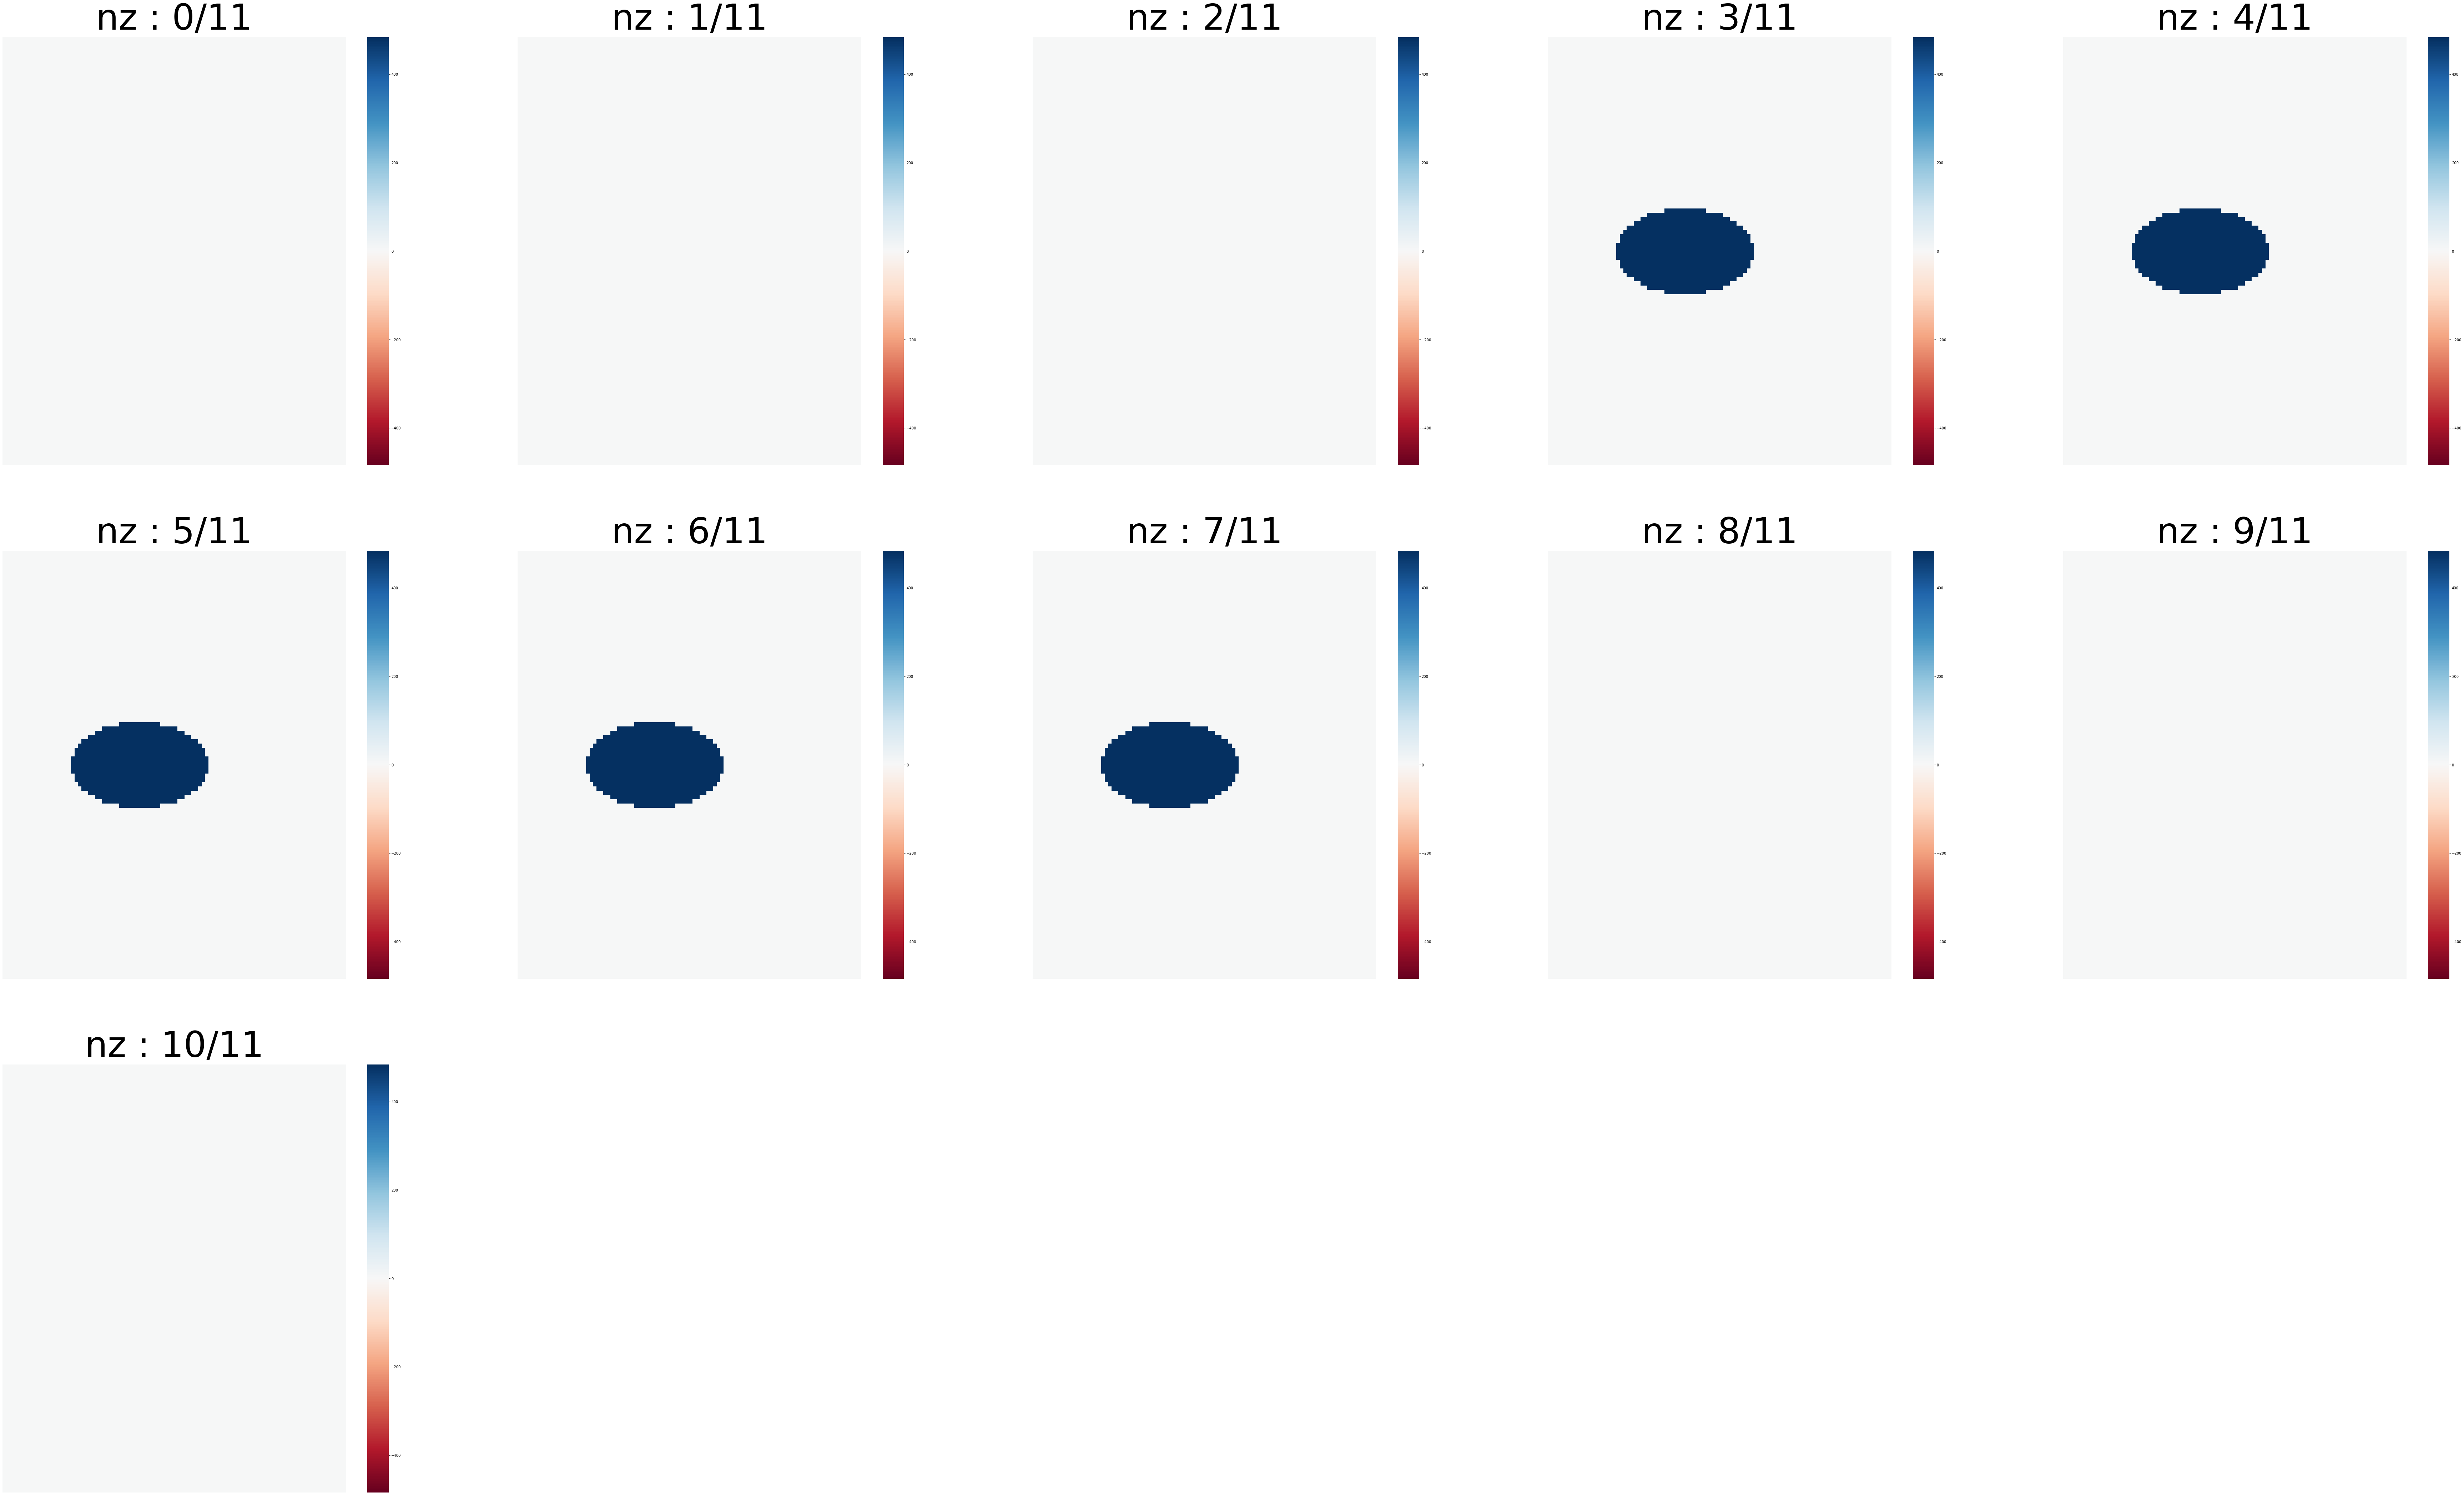

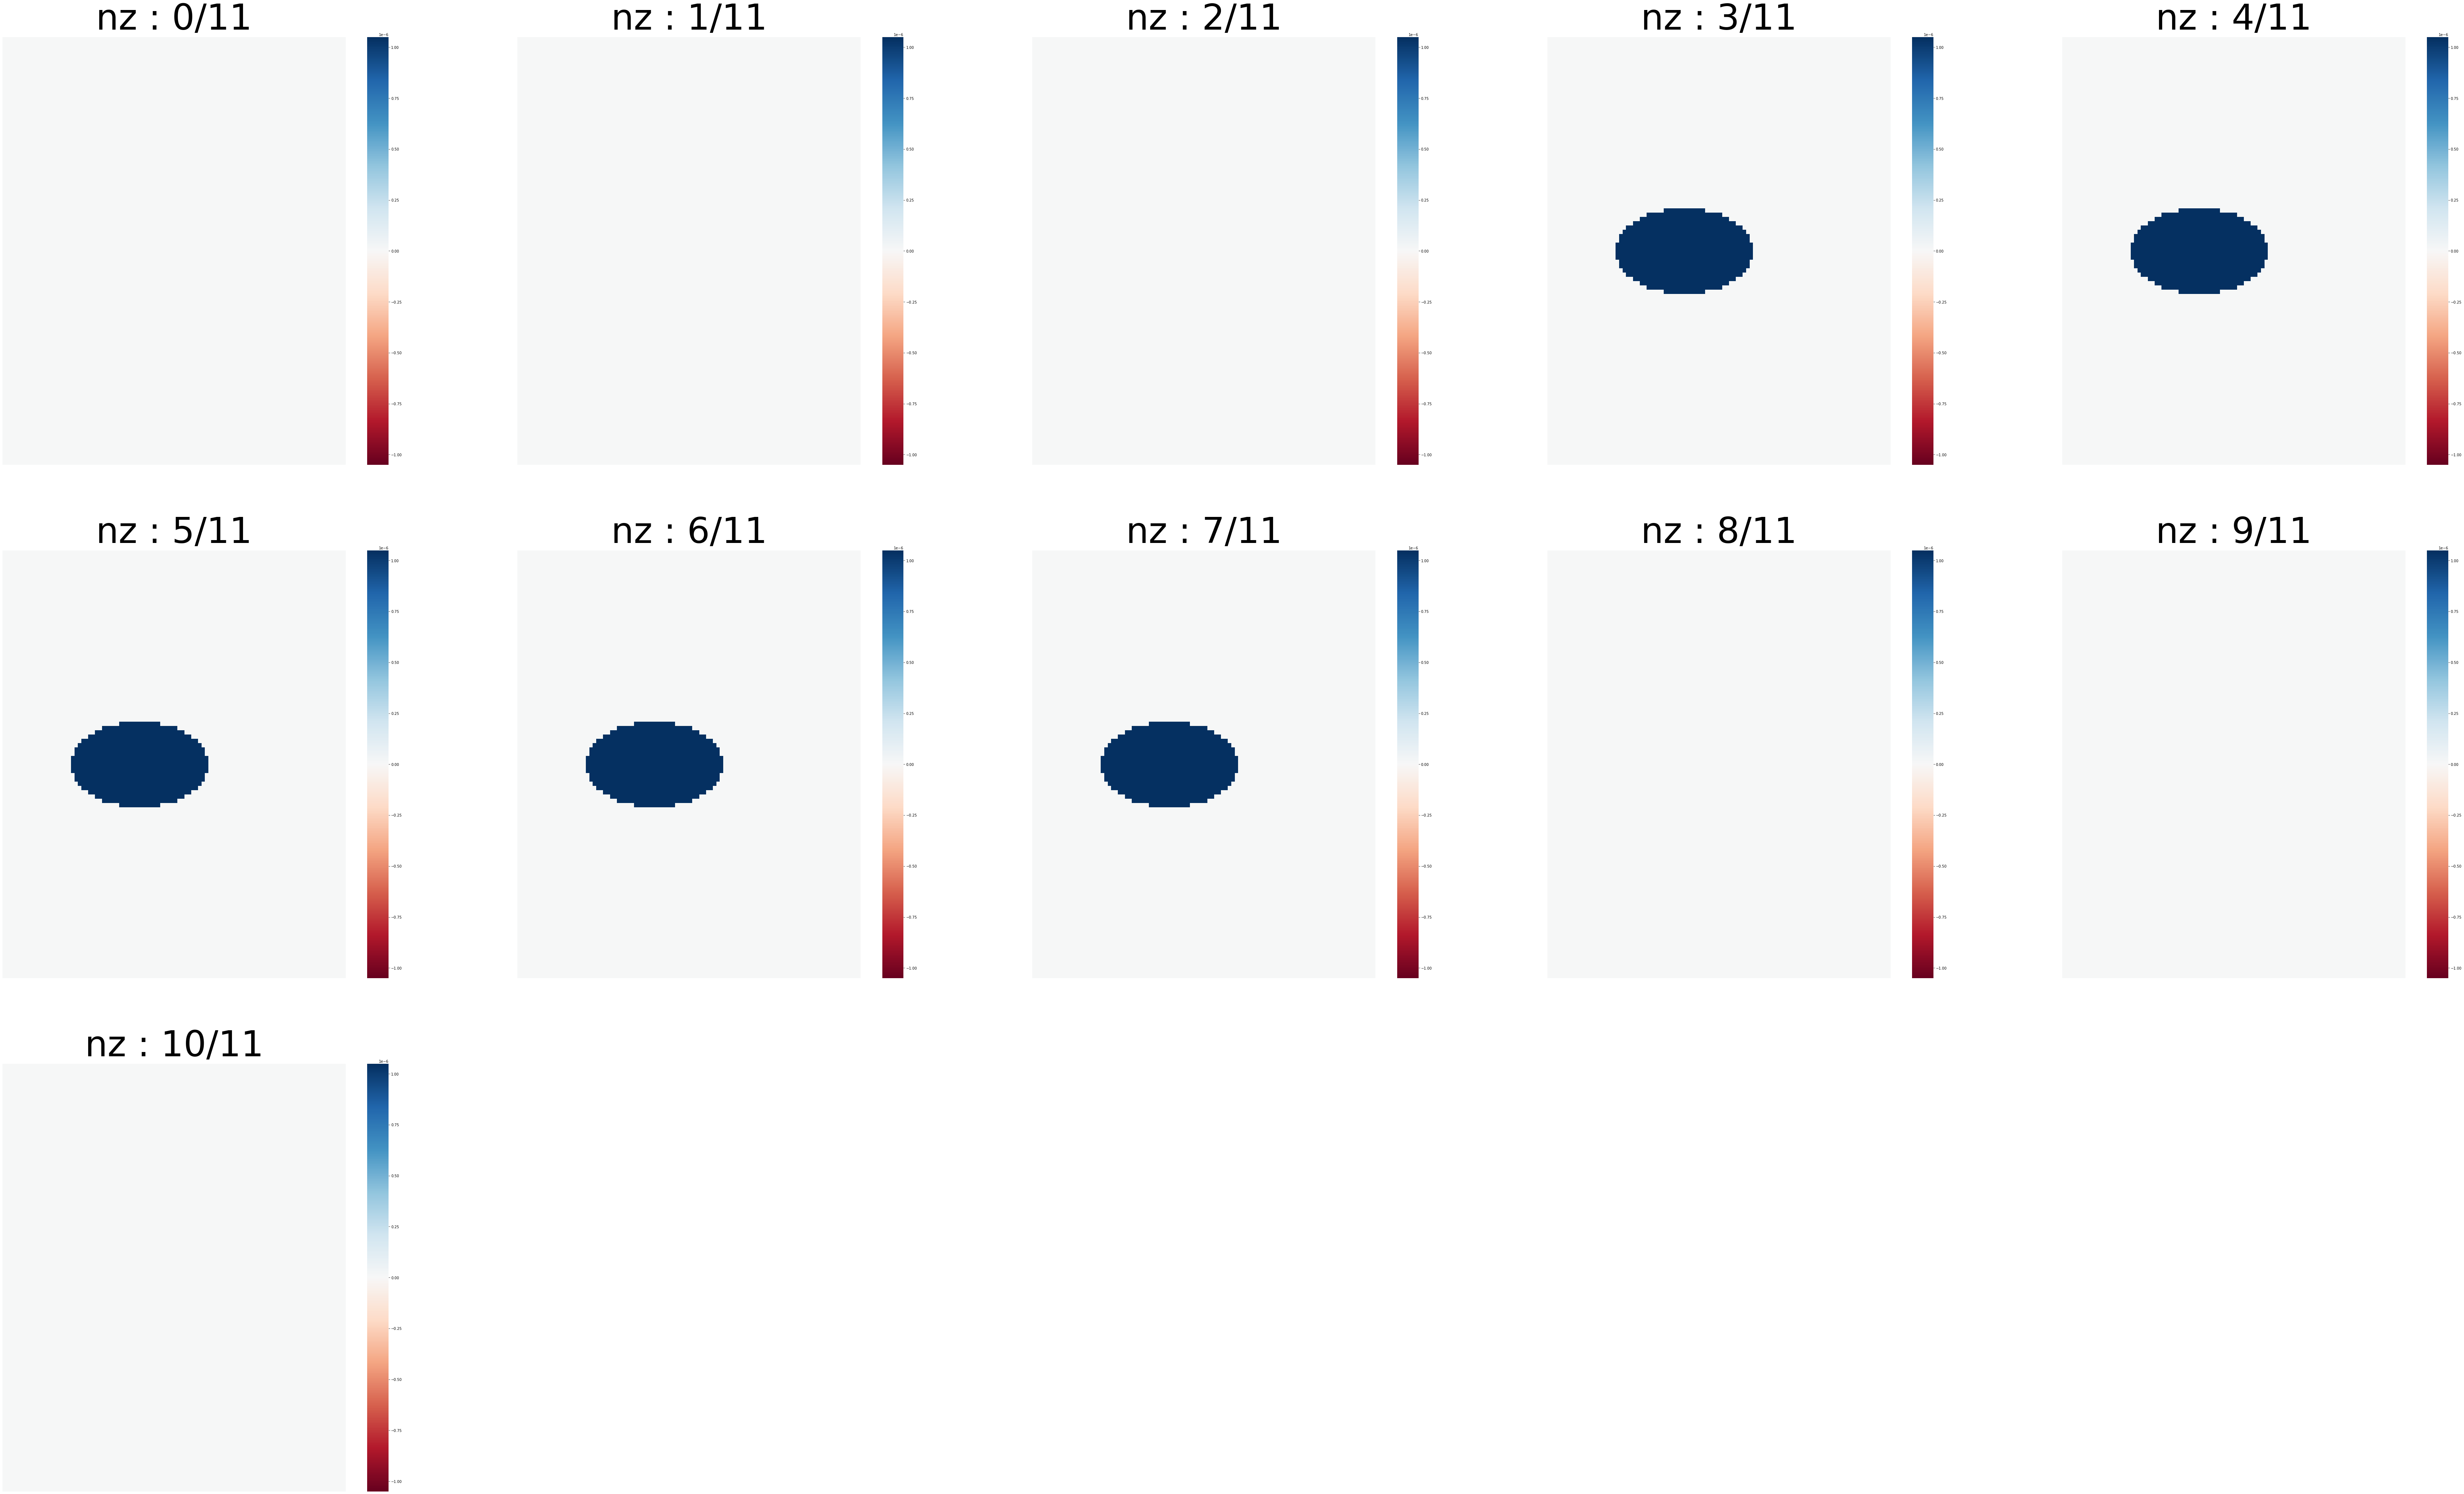

In [12]:
# Define space
m1 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

# Set geometry
m1.setCylindricalMask(center_x=40*10**-7, 
                      center_y=50*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=20*10**-7, 
                      radius_y=10*10**-7, 
                      height=5*10**-7,
                      angle=0)

# Get material
mater1 = mml.Ni_PolyCrystal()

# Asign material to the object
m1.asign_material(mater1)

# Print asigned property
pmv.show_MagProperties(m1.Ms, figsize=(25,25), fontsize=100)
pmv.show_MagProperties(m1.Aex, figsize=(25,25), fontsize=100)

> You can also asign a materials to the composed mask.

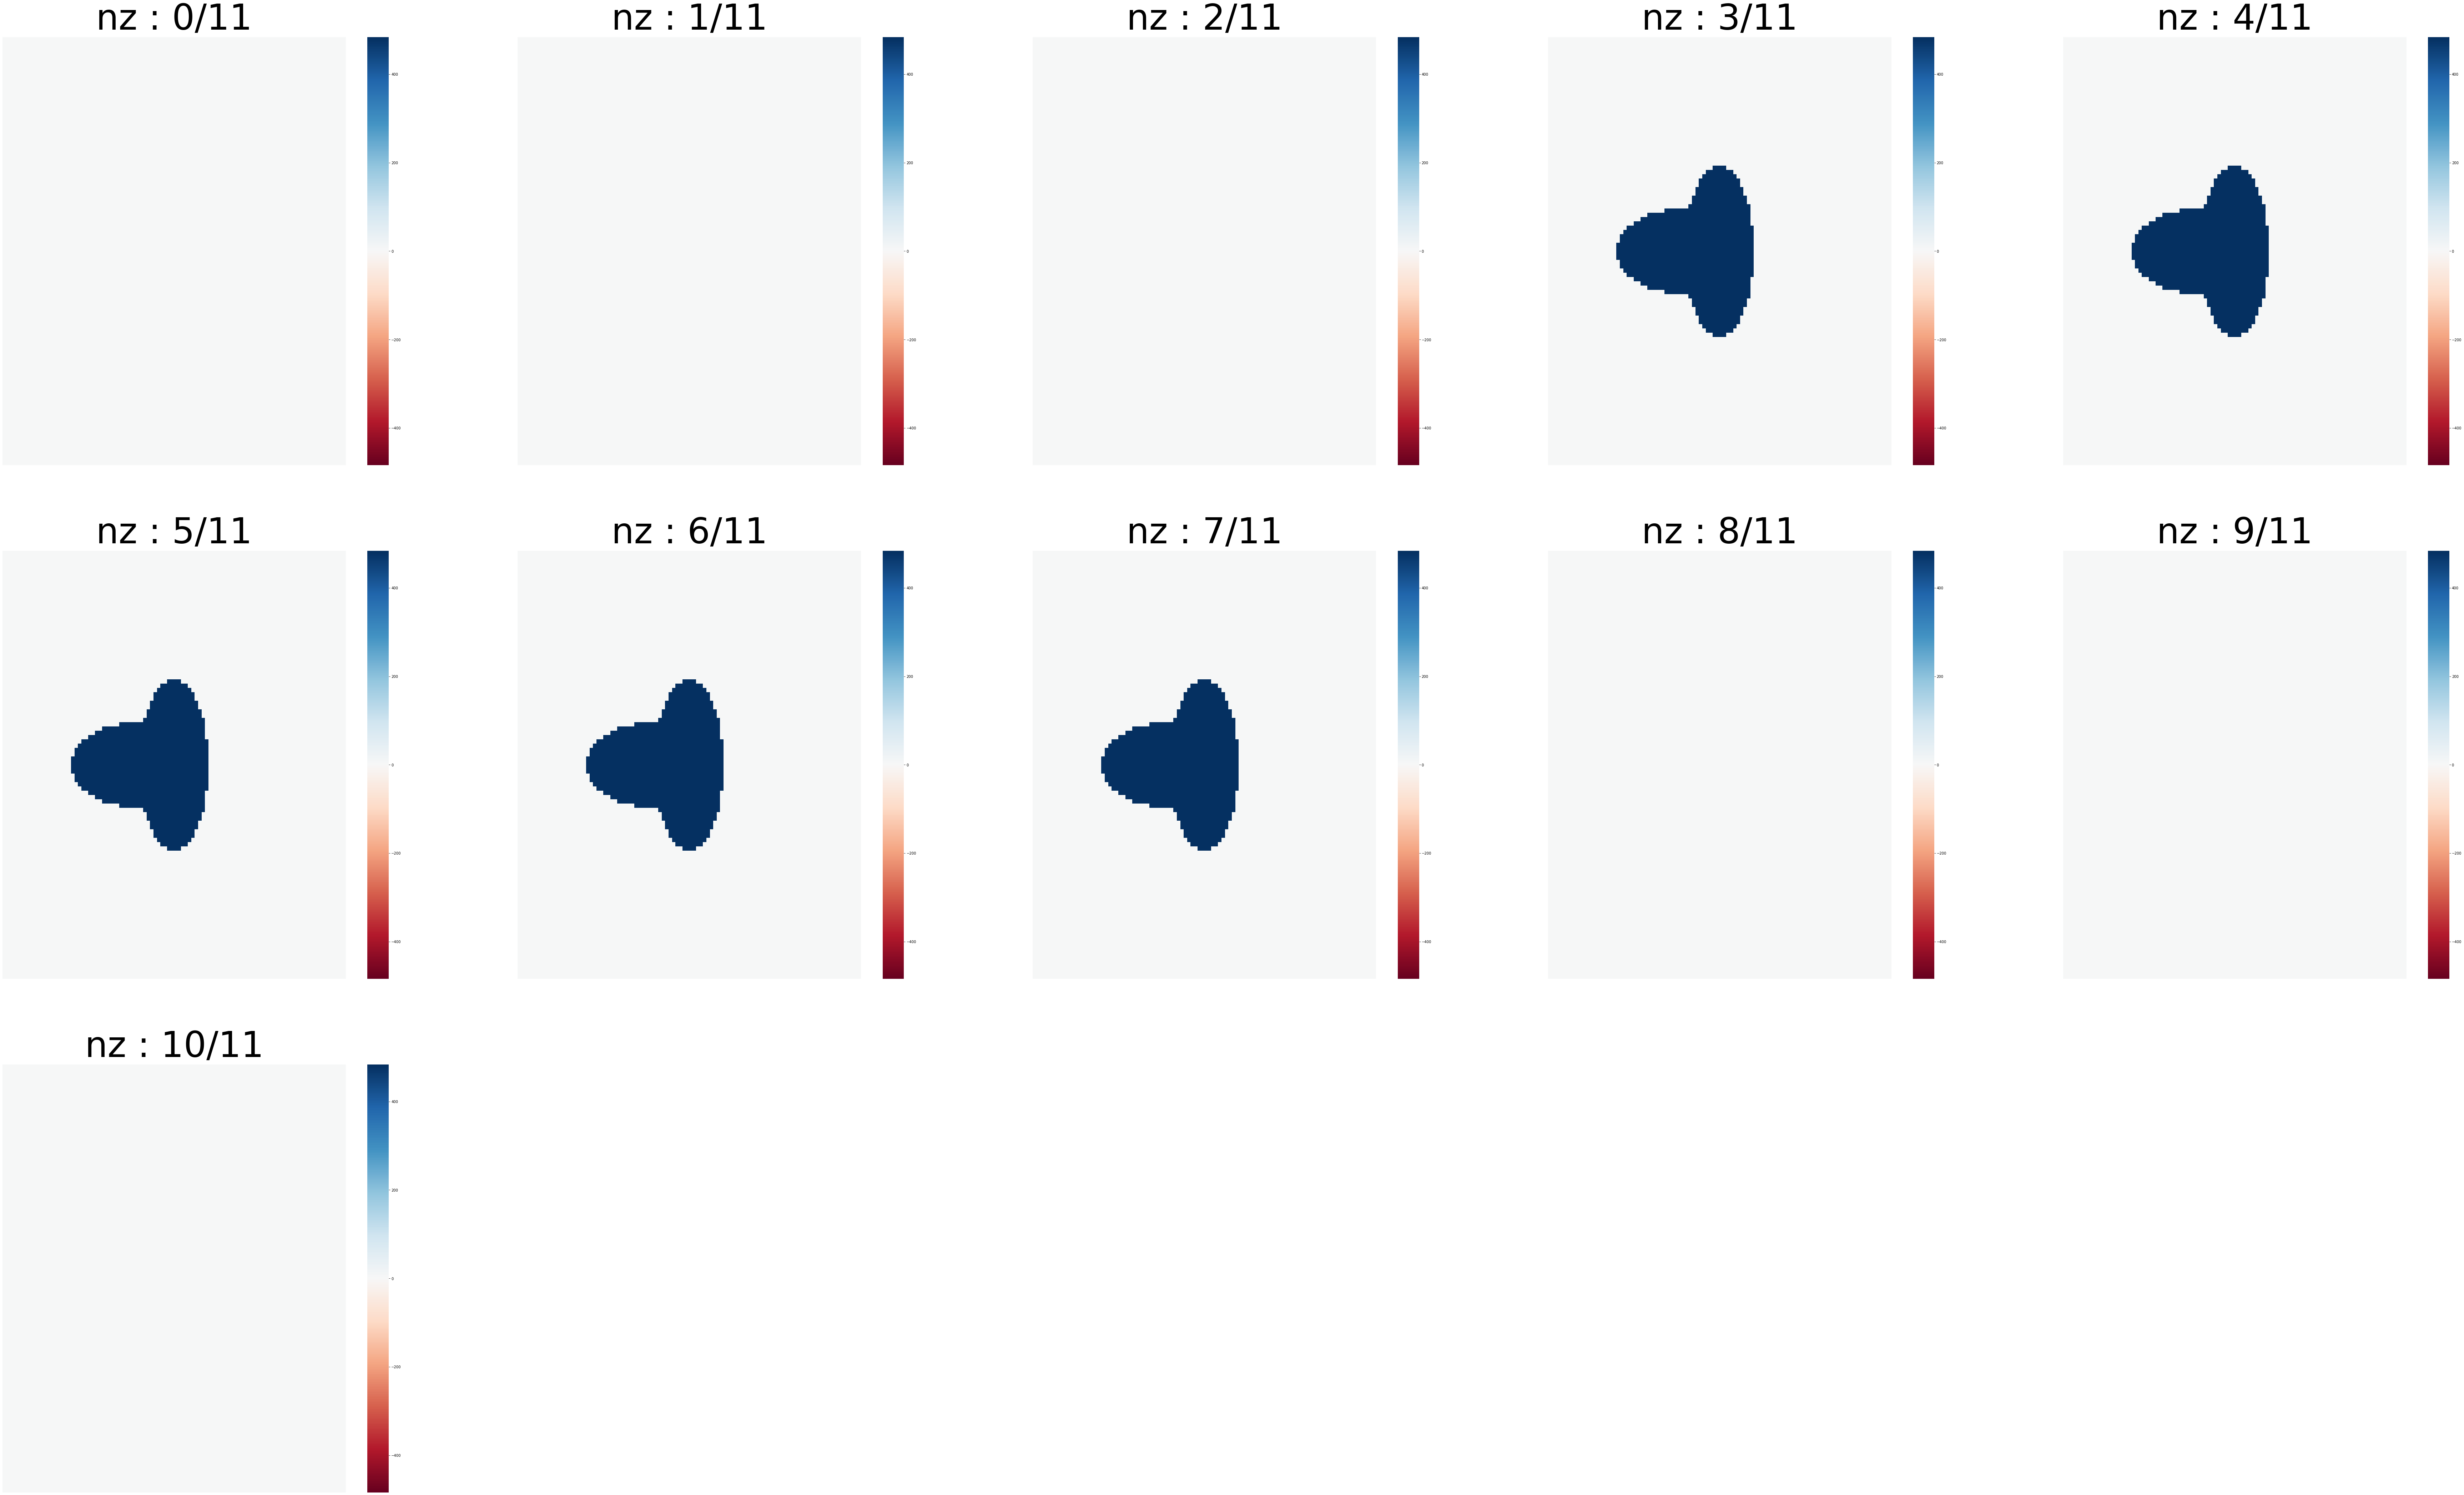

In [13]:
# Define one space
m1 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

# Clone the space
m2 = m1.clone()

# Set one mask
m1.setCylindricalMask(center_x=40*10**-7, 
                      center_y=50*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=20*10**-7, 
                      radius_y=10*10**-7, 
                      height=5*10**-7,
                      angle=0)

# Set another mask
m2.setCylindricalMask(center_x=50*10**-7, 
                      center_y=50*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=10*10**-7, 
                      radius_y=20*10**-7, 
                      height=5*10**-7,
                      angle=0)

# Compose the two masks
m3 = m1.union(m2)

# Get material
mater1 = mml.Ni_PolyCrystal()

# Asign material to the composed mask
m3.asign_material(mater1)

# Print asigned property
pmv.show_MagProperties(m3.Ms, figsize=(25,25), fontsize=100)

# Compose two different materials

> You can also compose two different mask with different matirials.

In [76]:
# Define one space
m1 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

# Clone the space
m2 = ppm.Ferromagnet(Lx=100*10**-7, 
                     Ly=100*10**-7, 
                     Lz=11*10**-7, 
                     nx=100, 
                     ny=100, 
                     nz=11)

# Set one mask
m1.setCylindricalMask(center_x=30*10**-7, 
                      center_y=50*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=20*10**-7, 
                      radius_y=10*10**-7, 
                      height=5*10**-7,
                      angle=0)

# Set another mask
m2.setCylindricalMask(center_x=70*10**-7, 
                      center_y=50*10**-7, 
                      center_z=5.5*10**-7, 
                      radius_x=10*10**-7, 
                      radius_y=20*10**-7, 
                      height=5*10**-7,
                      angle=0)

# Get material
mater1 = mml.Ni_PolyCrystal()
mater2 = mml.Ni_PolyCrystal()


# Asign material to the composed mask
m1.asign_material(mater1)
m2.asign_material(mater2)

# Initialize magnetization state
m1.setUniformMagnetization(thetaM0=0, phiM0=0)
m2.setRandomMagnetization()

# Compose two different materials
m_concat_z = m1.concat(m2, axis=0)
m_concat_y = m1.concat(m2, axis=1)
m_concat_x = m1.concat(m2, axis=2)
m_merge = m1.merge(m2)

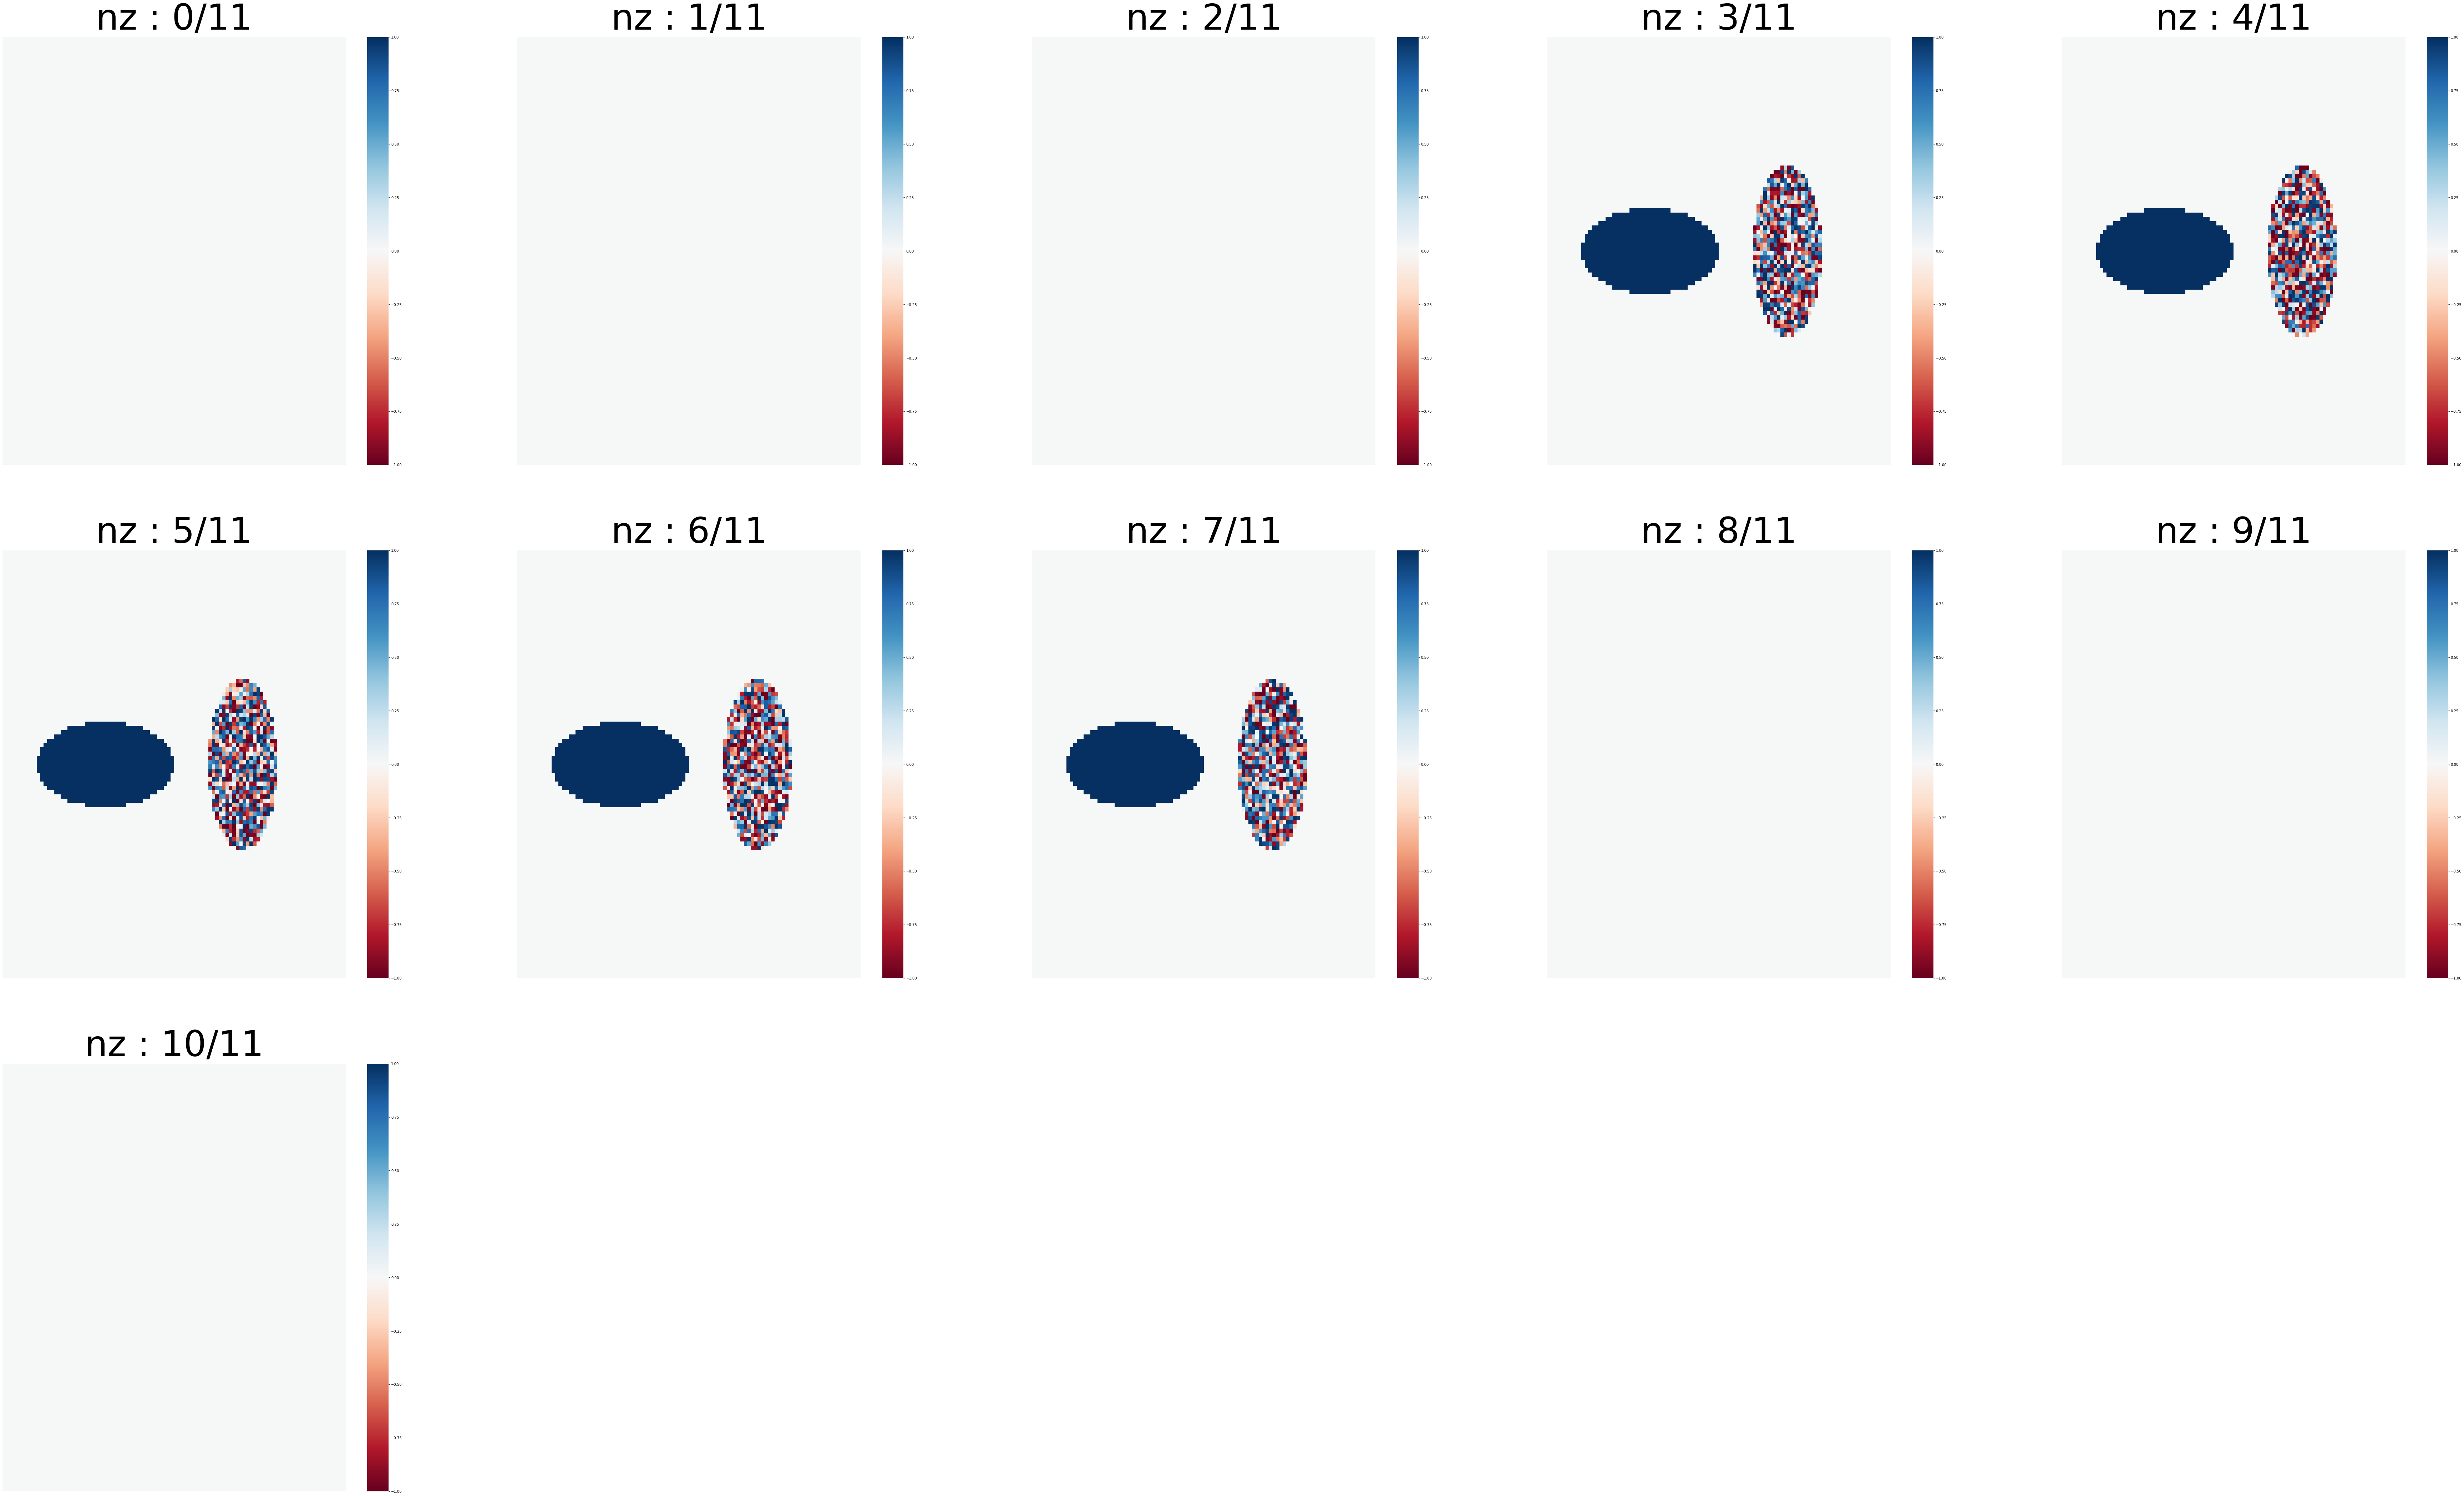

In [77]:
# Print asigned property
pmv.show_MagProperties(m_merge.mz, figsize=(25,25), fontsize=100)

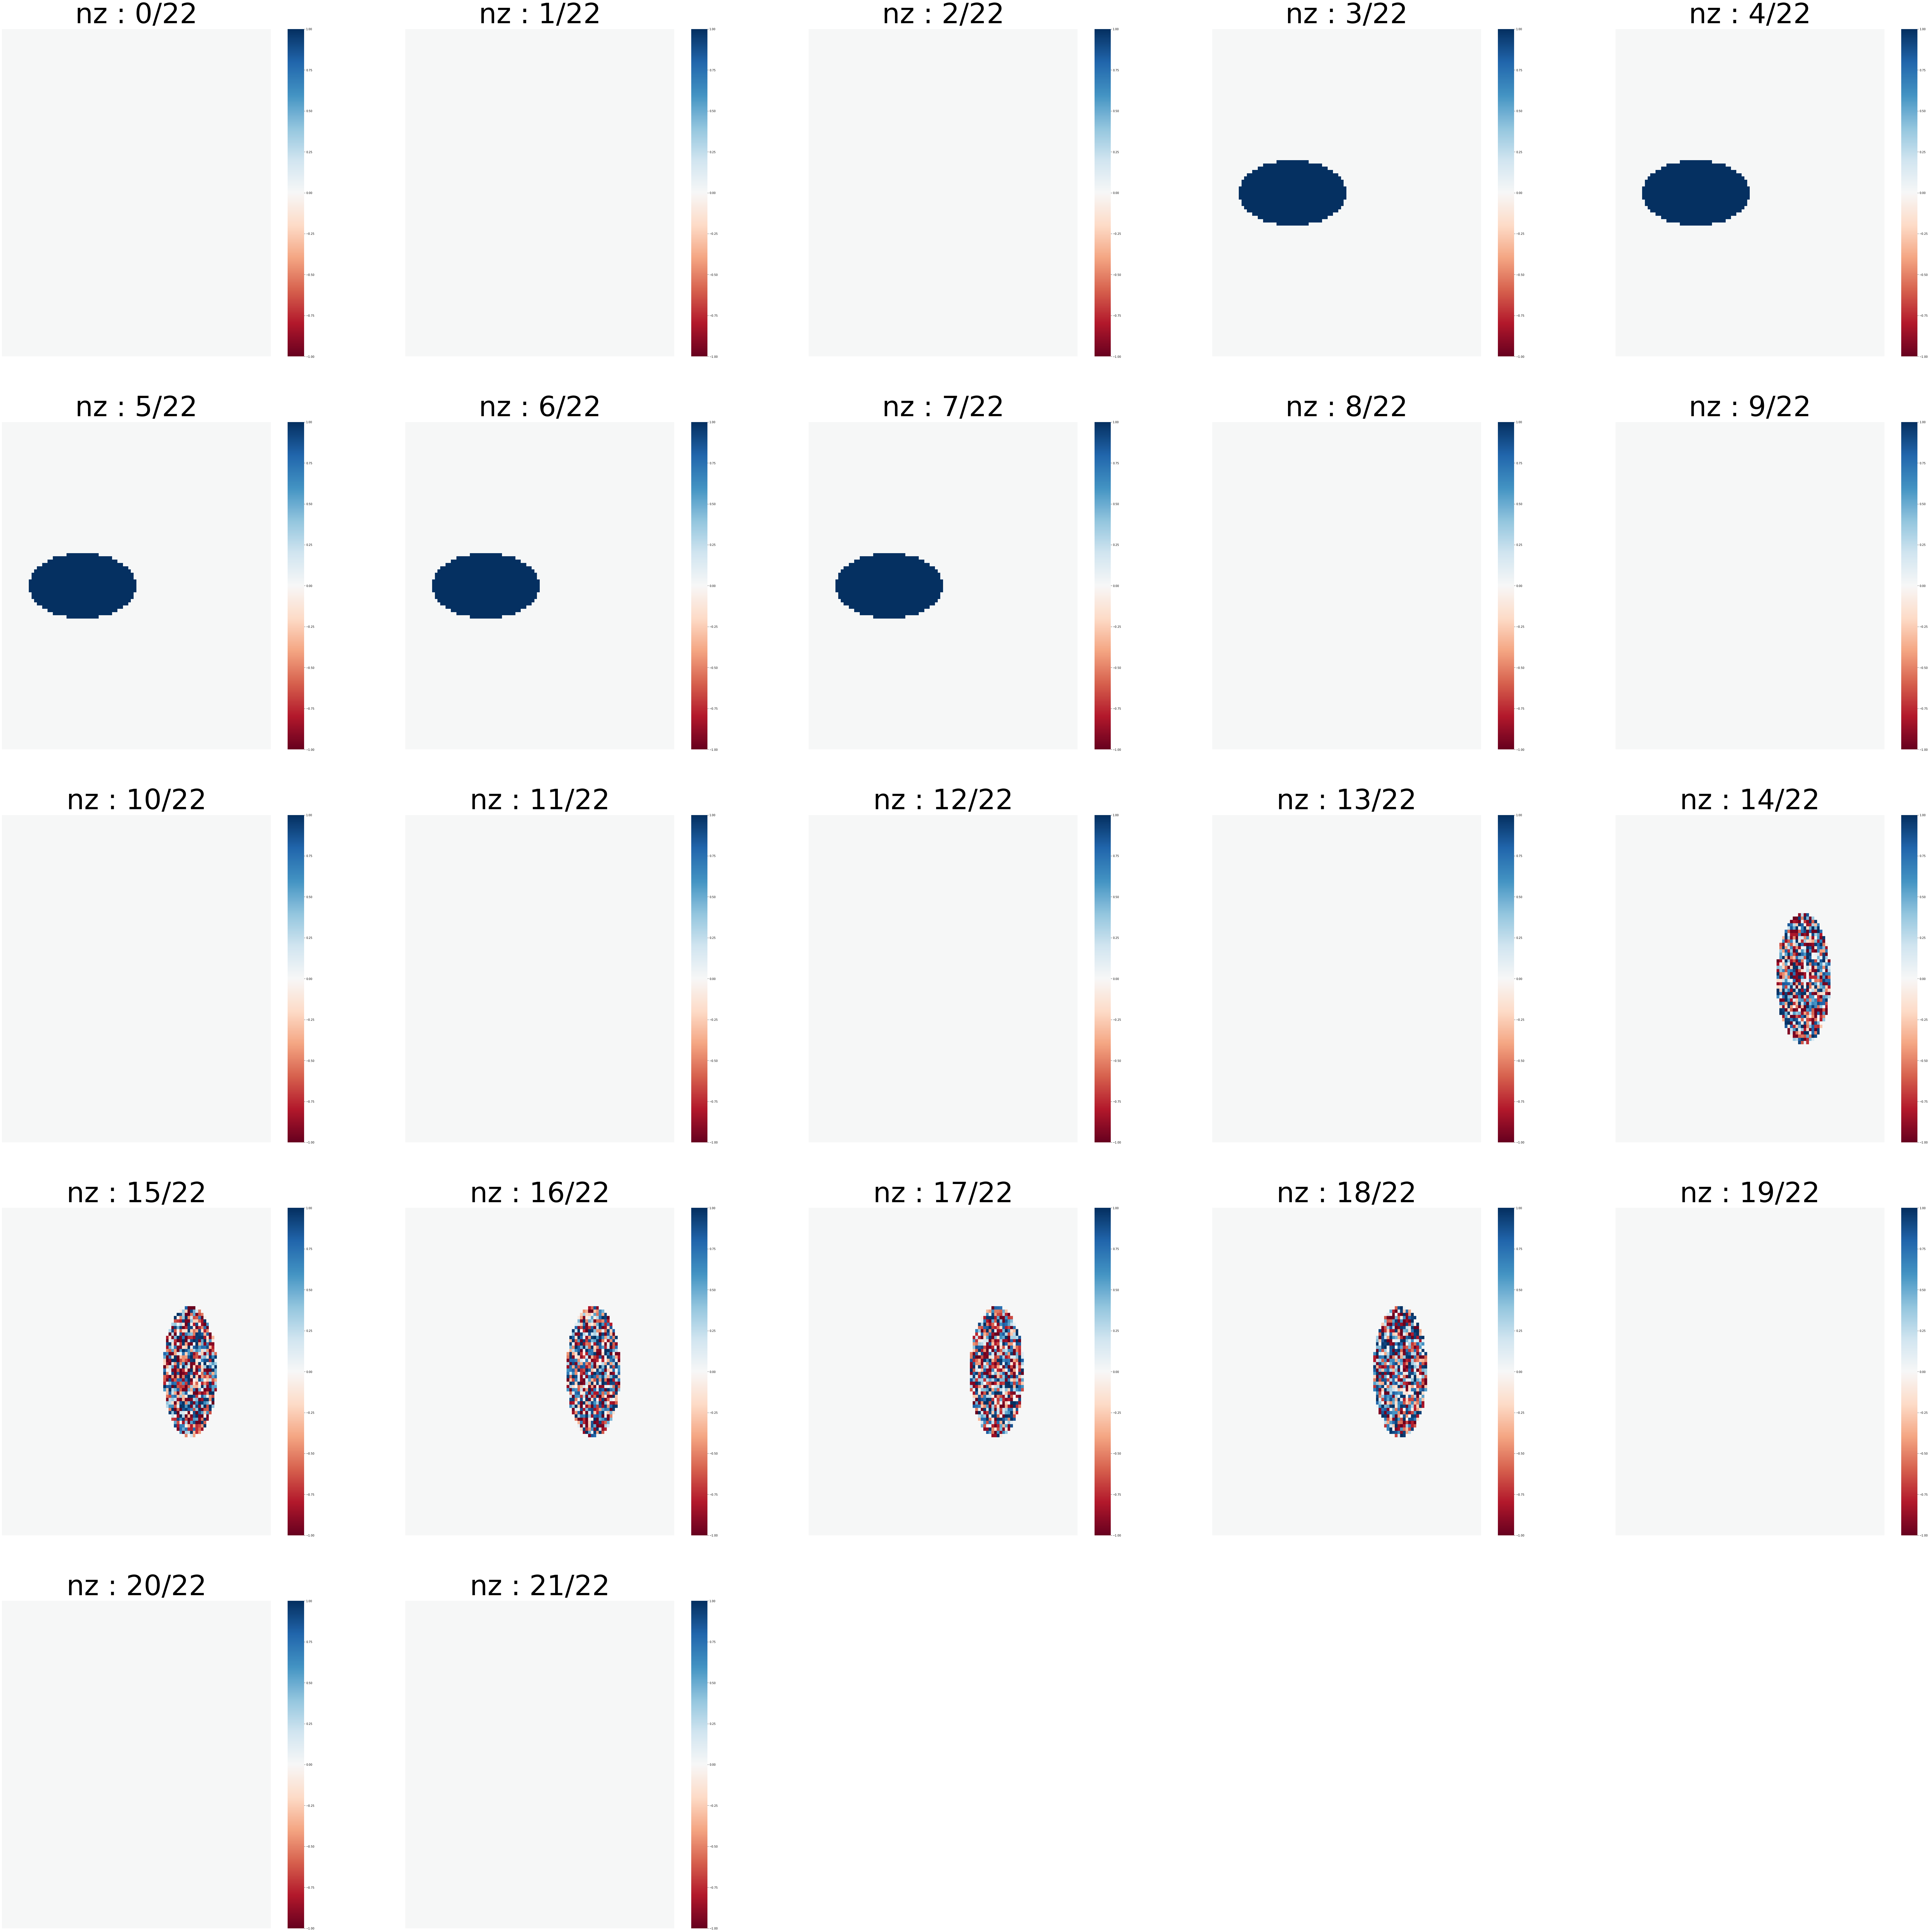

In [78]:
# Print asigned property
pmv.show_MagProperties(m_concat_x.mz, figsize=(50,25), fontsize=100)
pmv.show_MagProperties(m_concat_y.mz, figsize=(25,50), fontsize=100)
pmv.show_MagProperties(m_concat_z.mz, figsize=(25,25), fontsize=100)